# **Airbnb @ Victoria, British Columbia**
### Analysis of the Airbnb dataset of Victoria, BC collected on September 29, 2021
The website [Inside Airbnb](http://insideairbnb.com/victoria/) collects Airbnb listings data from several cities around the world. This website mentions that _Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities._ Let's find out!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


In [2]:
# read the listings dataset
listings = pd.read_csv('data/listings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1591,Garden Suite-King-Ensuite,1748,Jeff,Victoria,Rockland,48.42128,-123.33932,Private room,190,1,1,2021-09-13,1.00,8,178,1,NaN
1,19898,Duchess Suite,69729,Ryan,Victoria,Rockland,48.42515,-123.33977,Private room,279,2,0,NaN,NaN,1,0,0,NaN
2,41168,"Burma Suite, Ocean Island Garden Suites",173169,Ocean Island Garden Suites,Victoria,James Bay,48.41333,-123.37065,Entire home/apt,127,1,41,2017-07-04,0.46,4,1,21,NaN
3,47421,Downtown by the Park,214666,Jenny,Victoria,Downtown,48.42106,-123.36340,Entire home/apt,100,4,59,2019-08-06,0.44,1,293,1,NaN
4,54423,"Perfect Downtown Condo, free secure onsite Par...",254653,Pawlina And Martin,Victoria,Downtown,48.42151,-123.36383,Entire home/apt,92,30,62,2019-09-30,1.25,1,74,3,NaN


In [16]:
# verify the number of null values
listings.isna().sum()

id                                   0
name                                 1
host_id                              0
host_name                            1
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        291
reviews_per_month                  291
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3095
dtype: int64

In [27]:
# plot LonLat coordinates
px.scatter_mapbox(data_frame=listings, lat='latitude', lon='longitude', zoom=7, mapbox_style='carto-positron')

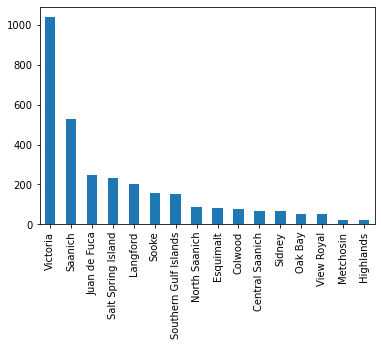

In [52]:
# number of listings per neighborhood group
listings['neighbourhood_group'].value_counts().plot(kind='bar');

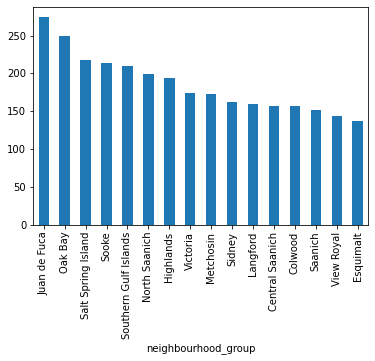

In [53]:
# average price-per-night by neighbouthoob group
listings.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).plot(kind='bar');

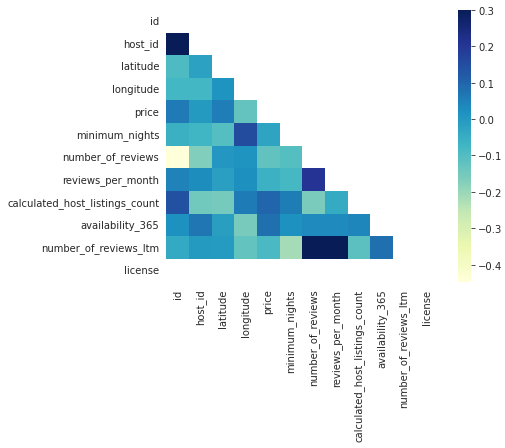

In [54]:
# correlation between variables using a heatmap
corr = listings.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=0.3, square=True, cmap='YlGnBu');

In [55]:
# listings locations
import folium
# sns.scatterplot(x=listings['longitude'], y=listings['latitude']);

# create folium map
# Note: folium needs coordinates in the order Latitude, Longitude
m = folium.Map(listings[['latitude', 'longitude']].mean().to_list(), tiles="Stamen Terrain", zoom_start=9)

# add all points
for index, row in listings.iterrows():
    folium.Marker(location=row[['latitude', 'longitude']].to_list()).add_to(m)

m